Importing Dataset

In [415]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api
from sklearn.metrics import mean_squared_error

%matplotlib inline
data = pd.read_csv('datasets/shampoo.csv')

print(data.head())
print(data.shape)
print(data.describe())

#Checking number of non-NA Values in each column
print("\nNum of NonNA Values : ")
num_na = data.count(axis=0)
print(num_na)

#Number of Observations
n = data.shape[0]

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
(36, 2)
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000

Num of NonNA Values : 
Month    36
Sales    36
dtype: int64


Visualizing the DataSet

<Figure size 432x288 with 0 Axes>

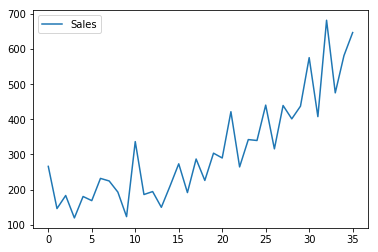

<Figure size 432x288 with 0 Axes>

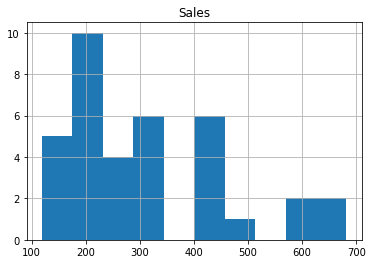

<Figure size 432x288 with 0 Axes>

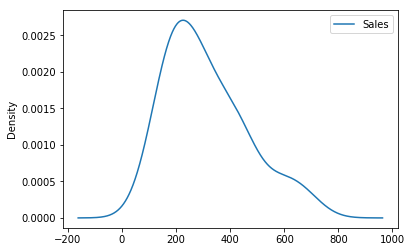

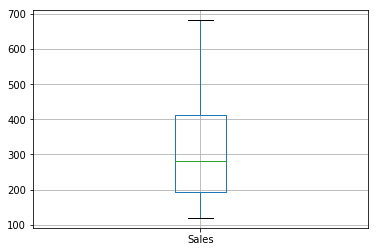

In [416]:
plt.figure()
data.plot()
plt.figure()
data.hist()
plt.figure()
data.plot.density()
plt.figure()
data.boxplot()

Checking the structure in Time Series Data using Lag Plots

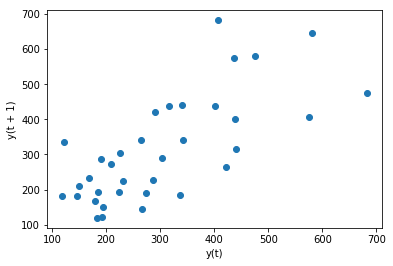

In [417]:
plt.figure()
pd.plotting.lag_plot(data["Sales"],lag=1)

There is some structure seen in lag_plot for lag = 1, 2, 3, 4

Plotting Autocorrelation of Time Series by lag (ACF)

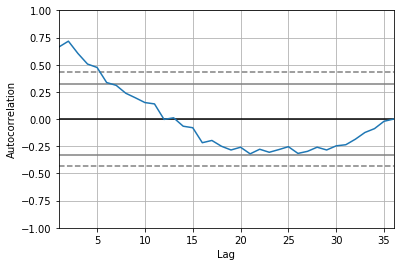

In [418]:
plt.figure()
pd.plotting.autocorrelation_plot(data["Sales"])

Using Naive Forecast / Persistence Forecast Model as baseline

In [419]:
def model_persistence(x):
    return (x)

baseline_predictions = np.array([model_persistence(data["Sales"][i]) for i in range(n-1)])
actual_baseline = np.array([data["Sales"][i] for i in range(1,n)])

rmse_baseline = sqrt(mean_squared_error(actual_baseline, baseline_predictions))
print("Baseline Pred RMSE = ", rmse_baseline)

Baseline Pred RMSE =  108.23764726616282


Will use an Autoregressive Forecast Model, with lag=2


In [420]:
from statsmodels.tsa.ar_model import AR
AR_model = AR(data["Sales"])

print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=2, method='cmle', ic=None, trend='c', maxiter=100)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=False)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred))
print("AR RMSE = ", rmse_AR)


Fitting
Lag Used =  2
Coefficients Found =
 const       8.210192
L1.Sales    0.292450
L2.Sales    0.751931
dtype: float64

Predicting
AR RMSE =  71.79170333020501


Will use an Autoregressive Forecast Model, with lag automatically determined using Akaike Information Criterion, Bayes Information Criterion, t-stat (Last Lag), Hannan-Quin Information Criterion

In [421]:
from statsmodels.tsa.ar_model import AR
AR_model = AR(data["Sales"])

print("Akaike Information Criterion")
print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=None, method='cmle', ic='aic', trend='c', maxiter=100)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=False)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred))
print("AR RMSE = ", rmse_AR)

print("\n\nBayes Information Criterion")
print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=None, method='cmle', ic='bic', trend='c', maxiter=100)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=False)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred))
print("AR RMSE = ", rmse_AR)

print("\n\nHannan-Quin Information Criterion")
print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=None, method='cmle', ic='hqic', trend='c', maxiter=100)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=False)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred))
print("AR RMSE = ", rmse_AR)

print("\n\nt-stat (Last Lag) Information Criterion")
print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=None, method='cmle', ic='t-stat', trend='c', maxiter=100)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=False)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred))
print("AR RMSE = ", rmse_AR)

Akaike Information Criterion

Fitting
Lag Used =  5
Coefficients Found =
 const      -20.327360
L1.Sales    -0.289116
L2.Sales     0.370015
L3.Sales     0.311572
L4.Sales     0.415815
L5.Sales     0.465187
dtype: float64

Predicting
AR RMSE =  57.622220396490796


Bayes Information Criterion

Fitting
Lag Used =  5
Coefficients Found =
 const      -20.327360
L1.Sales    -0.289116
L2.Sales     0.370015
L3.Sales     0.311572
L4.Sales     0.415815
L5.Sales     0.465187
dtype: float64

Predicting
AR RMSE =  57.622220396490796


Hannan-Quin Information Criterion

Fitting
Lag Used =  5
Coefficients Found =
 const      -20.327360
L1.Sales    -0.289116
L2.Sales     0.370015
L3.Sales     0.311572
L4.Sales     0.415815
L5.Sales     0.465187
dtype: float64

Predicting
AR RMSE =  57.622220396490796


t-stat (Last Lag) Information Criterion

Fitting
Lag Used =  5
Coefficients Found =
 const      -20.327360
L1.Sales    -0.289116
L2.Sales     0.370015
L3.Sales     0.311572
L4.Sales     0.415815
L5.Sal

See that all information criterion predict 5 as optimal lag value

Plotting the Actual vs Predicted Values

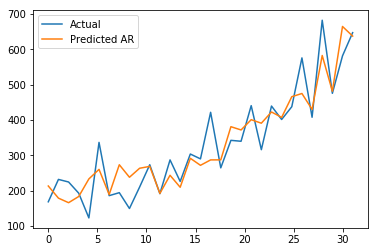

In [422]:
plt.plot(np.linspace(0,31,31),actual_AR, label="Actual")
plt.plot(np.linspace(0,31,31),AR_pred, label="Predicted AR")
plt.legend()

Using same Model with Dynamic In-Sample Prediction allowoed, to see if predictions improve

Akaike Information Criterion

Fitting
Lag Used =  5
Coefficients Found =
 const      -20.327360
L1.Sales    -0.289116
L2.Sales     0.370015
L3.Sales     0.311572
L4.Sales     0.415815
L5.Sales     0.465187
dtype: float64

Predicting
AR RMSE =  69.25861400064294


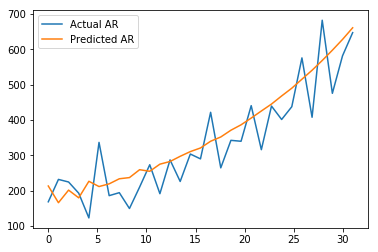

In [423]:
print("Akaike Information Criterion")
print("\nFitting")
modelAR_fit = AR_model.fit(maxlag=None, method='cmle', ic='aic', trend='c', maxiter=10000)
print("Lag Used = ", modelAR_fit.k_ar)
print('Coefficients Found =\n', modelAR_fit.params)
#make predictions
print("\nPredicting")
AR_pred2 = modelAR_fit.predict(start=modelAR_fit.k_ar,end=n-1,dynamic=True)
actual_AR = np.array([data["Sales"][i] for i in range(modelAR_fit.k_ar,n)])
rmse_AR = sqrt(mean_squared_error(actual_AR, AR_pred2))
print("AR RMSE = ", rmse_AR)

plt.plot(np.linspace(0,31,31),actual_AR, label="Actual AR")
plt.plot(np.linspace(0,31,31),AR_pred2, label="Predicted AR")
plt.legend()

Trying Next Model : ARIMA
AutoRegressive Integrated Moving Average

AR : Autoregressed
I : Replacing Data Points with their Ith differences to make it stationary
MA : Modelling Error as Linear Combination of Error Terms



Plotting to Find the Differencing

Var0 =  21566.104444444438
Var1 =  11596.951706122447
Var2 =  40454.83059688581
Var3 =  151435.03476584022


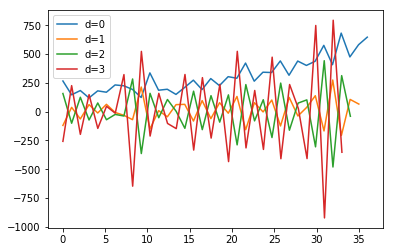

In [424]:
data_diff0 = data["Sales"]
plt.plot(np.linspace(0,n,n),data_diff0, label="d=0")
print("Var0 = ", np.var(data_diff0))
#Non Stationary mean, variance, covariance

data_diff1 = (data_diff0 - data_diff0.shift(1)).dropna()
plt.plot(np.linspace(0,n-1,n-1),data_diff1, label="d=1")
print("Var1 = ", np.var(data_diff1))
#Mean has stabilized

data_diff2 = (data_diff1 - data_diff1.shift(1)).dropna()
plt.plot(np.linspace(0,n-2,n-2),data_diff2, label="d=2")
print("Var2 = ", np.var(data_diff2))
#Worse than d=1

data_diff3 = (data_diff2 - data_diff2.shift(1)).dropna()
plt.plot(np.linspace(0,n-3,n-3),data_diff3, label="d=3")
print("Var3 = ", np.var(data_diff3))
#Worse than d=2

plt.legend()

We select d=1 as it is most stationary.

Trying with Only AR and I parts of model and setting MA part to 0 

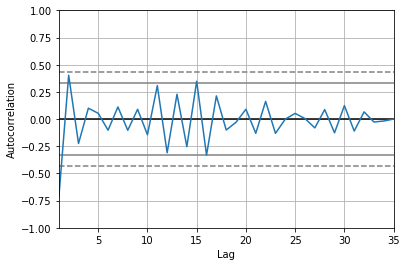

In [425]:
plt.figure()
pd.plotting.autocorrelation_plot(data_diff1)

In [426]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data["Sales"], order=(4,1,0))
print("\nFitting")
model_fit = model.fit(transparams=True,trend='c', method='mle', maxiter=10000)

print(model_fit.summary())


Fitting
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -196.393
Method:                           mle   S.D. of innovations             64.746
Date:                Thu, 09 May 2019   AIC                            404.787
Time:                        13:46:51   BIC                            414.119
Sample:                             1   HQIC                           408.008
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1964      3.217      3.791      0.001       5.891      18.502
ar.L1.D.Sales    -1.1456      0.176     -6.504      0.000      -1.491      -0.800
ar.L2.D.Sales    -0.6921      0

Plotting the Residuals to check trends

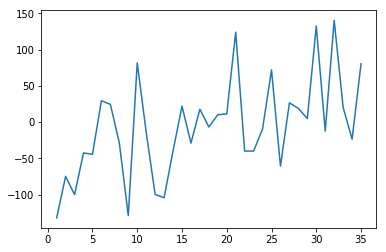

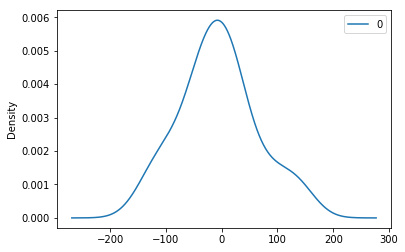

In [427]:
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
residuals.plot.density()

Making Predictions with Current ARIMA Model

lag=  4
ARIMA RMSE =  63.14488451507963


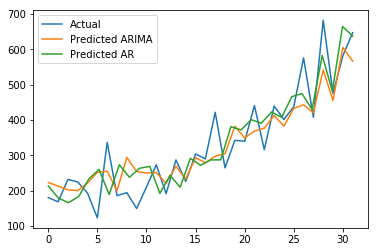

In [428]:
lag = model_fit.k_ar
print("lag= ", lag)
ARIMA_pred = model_fit.predict(start=lag,end=n-1,dynamic=False, typ='levels')
ARIMA_actual = np.array([data["Sales"][i] for i in range(lag,n)])
ARIMA_rmse = sqrt(mean_squared_error(ARIMA_actual, ARIMA_pred))
print("ARIMA RMSE = ", ARIMA_rmse)

plt.plot(np.linspace(0,31,len(ARIMA_actual)),ARIMA_actual, label="Actual")
plt.plot(np.linspace(0,31,len(ARIMA_actual)),ARIMA_pred, label="Predicted ARIMA")
plt.plot(np.linspace(0,31,len(AR_pred)),AR_pred, label="Predicted AR")

plt.legend()